# Projet

- Installation de [TreeTagger](http://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/) :

    -[x] Téléchargement du script et installation des dictionnaires
    
    -[x] Installation de la bibliothèque NLTK (Natural Language ToolKit)
    
    -[] Installation de ~~[python-treetagger](https://github.com/miotto/treetagger-python)~~ [treetaggerwrapper](https://treetaggerwrapper.readthedocs.io/en/latest/)
    
- Installation de ngram :

In [9]:
pip install ngram

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install treetaggerwrapper

Note: you may need to restart the kernel to use updated packages.


Test treetaggerwrapper

In [96]:
import pprint
import treetaggerwrapper as ttw
tagger = ttw.TreeTagger(TAGLANG='en')
tags = tagger.tag_text("This is a very bad short text to tag.")
pprint.pprint(tags)

['This\tDT0\tthis',
 'is\tVBZ\tbe',
 'a\tAT0\ta',
 'very\tAV0\tvery',
 'bad\tAJ0\tbad',
 'short\tAJ0\tshort',
 'text\tNN1\ttext',
 'to\tTO0\tto',
 'tag\tVVI\ttag',
 '.\tSENT\t.']


Importation du csv 'dataset', avec des points pour séparateurs (chaque attribut sera une phrase).

In [12]:
import pandas as pd
import csv, sys
dictline = {}
with open ("./ApprentissageEtLabel/dataset.csv", "r") as file:
    for num, line in enumerate(file,1):
        dictline[num]= line
#print(dictline)
df = pd.DataFrame.from_dict(dictline, orient='index')
display(df.head())

,0
1,Obviously made to show famous 1950s stripper M...
2,This film was more effective in persuading me ...
3,Unless you are already familiar with the pop s...
4,From around the time Europe began fighting Wor...
5,Im not surprised that even cowgirls get the bl...


Pour éviter des erreurs de type :
> ParserError: Error tokenizing data. C error: Expected 11 fields in line 3, saw 12

ou
> ' ' expected after '"'

J'ai transformé le fichier en dictionnaire (la clé étant le numéro de ligne, et la valeur la ligne entière) puis j'ai transformé ce dictionnaire en dataframe.

Infos sur le dataframe :

In [13]:
df.info()
df.dtypes
display(df.sample(5))
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 1 columns):
0    10000 non-null object
dtypes: object(1)
memory usage: 156.2+ KB


,0
9282,Far richer in texture and character than even ...
5235,"Good: Engaging cinematic firefights, great pre..."
7969,"Brian Dennehy, Bill Paxton, Joe Pantalino and,..."
7322,FORGET CREDIBILITYYou must not expect credibil...
6640,A bit of Trivia b/c I can't figure out how to ...


,0
9996,"Finally, an indie film that actually delivers ..."
9997,House of Games is a wonderful movie at multipl...
9998,"The movie was excellent, save for some of the ..."
9999,"""Spin it!""The 90s opened up with a clever Disn..."
10000,I keep watching this movie over and over and o...


Wordcloud

In [14]:
df[0]

1        Obviously made to show famous 1950s stripper M...
2        This film was more effective in persuading me ...
3        Unless you are already familiar with the pop s...
4        From around the time Europe began fighting Wor...
5        Im not surprised that even cowgirls get the bl...
6        (48 out of 278 people found this comment usefu...
7        Went to watch this movie expecting a 'nothing ...
8        A good cast and they do their best with what t...
9        The only thing that kept me from vomiting afte...
10       I just watched this film 15 minutes ago, and I...
11       There are two reasons why I did not give a 1 t...
12       "The Man In The Attic" is a movie set in the 1...
13       During a sleepless night, I was switching thro...
14       No,Basically your watching something that does...
15       I am dumbfounded that I actually sat and watch...
16       In an otherwise good review, loleralacartelort...
17       This version of "Moby Dick" insults the audien.

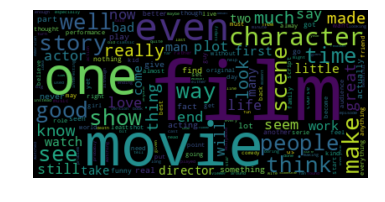

In [15]:
from wordcloud import WordCloud as wc
import PIL
import itertools
import matplotlib.pyplot as plt



#concatenate all words from column and count them
wordcloud2 = wc().generate(' '.join(df[0]))
#plt.figure()margin=0).generate(raw_str)
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()
 

Tester avec la librairie nltk pour voir les changements.

In [16]:
# Copie du dataframe de manière à tester nltk
df2 = df

from nltk.corpus import movie_reviews as mr
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
# Pour calculer la fréquence des mots
from nltk import FreqDist

# tokenize words, la variable mots sera une liste
freq = df2[0].str.split(expand=True).stack().value_counts()
print(freq)

the                 109153
and                  58150
a                    58059
of                   55001
to                   51547
is                   39810
in                   32357
I                    27169
that                 25272
this                 23751
it                   21306
was                  18287
as                   15773
with                 15704
for                  15542
The                  12789
movie                12741
but                  12109
on                   12014
have                 10840
are                  10816
you                  10601
film                 10311
be                   10082
not                  10058
his                   9910
one                   8217
at                    8187
he                    8139
by                    8057
                     ...  
perfect!"Emma"           1
no-personality           1
state-room               1
iconoclast               1
clise                    1
York!!!!                 1
N

In [18]:
stopWords = set(stopwords.words('english'))
print(len(stopWords))
print(stopWords)

179
{"mustn't", 'ourselves', 'then', "hasn't", 'had', "you'll", 'other', 'an', 'him', 'ma', 'hasn', 'few', 'has', 'are', 'off', 'again', 'wasn', 'with', 'just', 'aren', 'here', 'haven', 'on', 'yourself', 'them', 'shouldn', 'it', "shouldn't", 'weren', 'too', 'which', 're', 'they', 'o', "wasn't", 'herself', 'will', 'both', "that'll", 'himself', 'mightn', 'y', 'own', "you've", 'over', 'now', 'under', 'this', 'after', "don't", 'what', 'am', 'your', 'very', "she's", 'didn', 'through', 'the', 'were', "weren't", 'for', 'yourselves', 'when', 'any', 'ain', 'some', 'doesn', 'these', 'such', 'hadn', "hadn't", 've', 'being', 'most', 'until', "shan't", 'have', 'themselves', "needn't", 'is', 'how', "aren't", "you're", 'we', 'above', 'about', 'up', 'between', 'at', 's', "didn't", 'her', 'not', 'ours', 'its', 'into', 'who', 'to', 'wouldn', 'while', 'of', "you'd", 'whom', 'won', 'against', 'myself', 'my', "it's", "won't", 'was', 'further', 'before', 'once', 'same', 'but', 'than', 'did', 'hers', 'more',

Élimination de la ponctuation

Transformer les phrases dans les commentaires en token

In [29]:
import nltk
df2['tokenized_sents'] = df.apply(lambda row: nltk.sent_tokenize(row[0]), axis=1)
df2.head()
display(df2['tokenized_sents'])

1        [Obviously made to show famous 1950s stripper ...
2        [This film was more effective in persuading me...
3        [Unless you are already familiar with the pop ...
4        [From around the time Europe began fighting Wo...
5        [Im not surprised that even cowgirls get the b...
6        [(48 out of 278 people found this comment usef...
7        [Went to watch this movie expecting a 'nothing...
8        [A good cast and they do their best with what ...
9        [The only thing that kept me from vomiting aft...
10       [I just watched this film 15 minutes ago, and ...
11       [There are two reasons why I did not give a 1 ...
12       ["The Man In The Attic" is a movie set in the ...
13       [During a sleepless night, I was switching thr...
14       [No,Basically your watching something that doe...
15       [I am dumbfounded that I actually sat and watc...
16       [In an otherwise good review, loleralacartelor...
17       [This version of "Moby Dick" insults the audie.

Tokenisation des mots dans les phrases

In [33]:
df2['tokenized_words'] = df.apply(lambda row: nltk.word_tokenize(row[0]), axis=1)
df2.head()

,0,tokenized_sents,tokenized_words
1,Obviously made to show famous 1950s stripper M...,[Obviously made to show famous 1950s stripper ...,"[Obviously, made, to, show, famous, 1950s, str..."
2,This film was more effective in persuading me ...,[This film was more effective in persuading me...,"[This, film, was, more, effective, in, persuad..."
3,Unless you are already familiar with the pop s...,[Unless you are already familiar with the pop ...,"[Unless, you, are, already, familiar, with, th..."
4,From around the time Europe began fighting Wor...,[From around the time Europe began fighting Wo...,"[From, around, the, time, Europe, began, fight..."
5,Im not surprised that even cowgirls get the bl...,[Im not surprised that even cowgirls get the b...,"[Im, not, surprised, that, even, cowgirls, get..."


[Olivier]: Définir les tokens sur les mots puis retirer ponctuation et transformer les contractions en mots complets.

In [40]:
from sets import set
duplicated_wtokens = df2['tokenized_words'].sum()

In [43]:
#remove duplicates
unique = set()
tokens = []
for elt in duplicated_wtokens:
    if elt not in unique:
        tokens.append(elt)
        unique.add(elt)
print(tokens)


['Obviously', 'made', 'to', 'show', 'famous', '1950s', 'stripper', 'Misty', 'Ayers', '``', 'acting', "''", 'talents', '.', 'Too', 'bad', 'she', 'ca', "n't", 'act.Boring', 'little', 'tale', 'about', 'sweet', ',', 'innocent', 'Sally', 'Down', '(', ')', 'being', 'drugged', 'and', 'forced', 'into', 'white', 'slavery', 'prostitution', 'Then', 'meets', 'likable', 'Tommy', 'Cole', 'who', 'instantly', 'falls', 'in', 'love', 'with', 'her', 'He', 'wants', 'help', 'escape', 'but', 'can', 'he', '?', 'You', 'really', 'wo', 'care.There', "'s", 'no', 'real', 'skin', 'here', '--', 'just', 'strips', 'down', 'SLOWLY', 'underwear', 'twice', 'The', 'rest', 'is', 'a', 'boring', 'chockful', 'of', 'atrocious', 'comedy', 'never', 'thought', 'was', 'funny', 'what', 'do', 'I', 'know', 'terrible', 'post-dubbed', 'dialogue', 'admit', 'there', 'twist', 'at', 'the', 'end', 'did', 'see', 'coming', 'that', 'not', 'enough', 'sit', 'through', 'this', 'Also', "'", 'attempts', 'are', 'hysterical', '!', 'A', 'bomb', 'Avoi

Test si la liste tokens comporte bien des éléments uniques

In [92]:
print(tokens.count('the'))
print(len(tokens))
print(tokens[:10])

1
88147
['Obviously', 'made', 'to', 'show', 'famous', '1950s', 'stripper', 'Misty', 'Ayers', '``']


Sauvegarde de la liste de tokens uniques dans un fichier (pour ne pas avoir à le refaire, parce que c'est lourd)

In [89]:
tokensdf = pd.DataFrame(tokens)
tokensdf.to_csv('tokens.csv', index = False, header = False)

Tester la récupération de la liste

In [90]:
with open('tokens.csv', 'r') as f:
  reader = csv.reader(f)
  tokenlist = list(reader)
  flattened = [val for sublist in tokenlist for val in sublist]

In [93]:
print(flattened[:10])
print(len(flattened))
print(flattened.count('the'))

['Obviously', 'made', 'to', 'show', 'famous', '1950s', 'stripper', 'Misty', 'Ayers', '``']
88147
1


In [ ]:
Transformer les contractions en mots avant de retirer la ponctuation.
Voir si on peut garder certains éléments de ponctuation tels que ??? ou !!!!

In [95]:
words = [word for word in flattened if word.isalpha()]
print(len(words))
print(words)

59220
['Obviously', 'made', 'to', 'show', 'famous', 'stripper', 'Misty', 'Ayers', 'acting', 'talents', 'Too', 'bad', 'she', 'ca', 'little', 'tale', 'about', 'sweet', 'innocent', 'Sally', 'Down', 'being', 'drugged', 'and', 'forced', 'into', 'white', 'slavery', 'prostitution', 'Then', 'meets', 'likable', 'Tommy', 'Cole', 'who', 'instantly', 'falls', 'in', 'love', 'with', 'her', 'He', 'wants', 'help', 'escape', 'but', 'can', 'he', 'You', 'really', 'wo', 'no', 'real', 'skin', 'here', 'just', 'strips', 'down', 'SLOWLY', 'underwear', 'twice', 'The', 'rest', 'is', 'a', 'boring', 'chockful', 'of', 'atrocious', 'comedy', 'never', 'thought', 'was', 'funny', 'what', 'do', 'I', 'know', 'terrible', 'dialogue', 'admit', 'there', 'twist', 'at', 'the', 'end', 'did', 'see', 'coming', 'that', 'not', 'enough', 'sit', 'through', 'this', 'Also', 'attempts', 'are', 'hysterical', 'A', 'bomb', 'Avoid', 'This', 'film', 'more', 'effective', 'persuading', 'me', 'Zionist', 'conspiracy', 'than', 'Muslim', 'one', '

## Étapes suivantes :
- stopwords
    - Ajouter certains mots spécifiques du vocabulaire filmographique dans les stops (p. ex movie, film, cinema…)
- Potentiellement enlever les mots à faible fréquence
- voir la lemmatisation
- méthodes ngram, treetagger et bag of words